<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(_0_8)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-0.8'

In [4]:
os.listdir(base_path)

['data_add_delta_-0.8_n20.csv',
 'data_add_delta_-0.8_n250.csv',
 'data_add_delta_-0.8_n120.csv',
 'data_add_delta_-0.8_n60.csv',
 'data_add_delta_-0.8_n30.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.8_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,55.520235,70.781195,55.064556,-0.054509,191.311477,191.353483,-0.042007
1,0.0,1.0,49.633248,31.808392,89.943005,0.134488,181.519134,181.385074,0.134060
2,0.0,2.0,79.051543,86.882070,86.242875,0.086888,262.263377,262.221342,0.042035
3,0.0,3.0,32.810280,68.486692,41.625341,-0.050173,152.872141,152.874634,-0.002494
4,0.0,4.0,85.777397,28.543795,67.874953,-0.602517,191.593627,192.209705,-0.616079
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,73.858673,38.595120,58.321323,-0.257472,180.517644,180.760724,-0.243079
249996,999.0,246.0,89.759600,89.326499,98.704931,0.156461,287.947491,287.795589,0.151902
249997,999.0,247.0,20.756026,33.971366,62.009625,0.025921,126.762938,126.736918,0.026020
249998,999.0,248.0,25.214799,76.248143,59.392842,0.222465,171.078248,170.878799,0.199448


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,55.520235,70.781195,55.064556,-0.054509,191.311477,191.353483,-0.042007
1,0.0,1.0,49.633248,31.808392,89.943005,0.134488,181.519134,181.385074,0.134060
2,0.0,2.0,79.051543,86.882070,86.242875,0.086888,262.263377,262.221342,0.042035
3,0.0,3.0,32.810280,68.486692,41.625341,-0.050173,152.872141,152.874634,-0.002494
4,0.0,4.0,85.777397,28.543795,67.874953,-0.602517,191.593627,192.209705,-0.616079
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,73.858673,38.595120,58.321323,-0.257472,180.517644,180.760724,-0.243079
249996,999.0,246.0,89.759600,89.326499,98.704931,0.156461,287.947491,287.795589,0.151902
249997,999.0,247.0,20.756026,33.971366,62.009625,0.025921,126.762938,126.736918,0.026020
249998,999.0,248.0,25.214799,76.248143,59.392842,0.222465,171.078248,170.878799,0.199448


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    55.520235  70.781195  55.064556 -0.054509  191.311477   
      1.0    49.633248  31.808392  89.943005  0.134488  181.519134   
      2.0    79.051543  86.882070  86.242875  0.086888  262.263377   
      3.0    32.810280  68.486692  41.625341 -0.050173  152.872141   
      4.0    85.777397  28.543795  67.874953 -0.602517  191.593627   
...                ...        ...        ...       ...         ...   
999.0 245.0  73.858673  38.595120  58.321323 -0.257472  180.517644   
      246.0  89.759600  89.326499  98.704931  0.156461  287.947491   
      247.0  20.756026  33.971366  62.009625  0.025921  126.762938   
      248.0  25.214799  76.248143  59.392842  0.222465  171.078248   
      249.0  26.942382  48.174964  66.909055 -0.129282  151.897119   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    191.353483 -0.042007  
      1.0    181.385074  0.134060  
      2.0    262.221342  0.042035  
      3.0    152.874634 -0.002494  
      4.0    192.209705 -0.616079  
...                 ...       ...  
999.0 245.0  180.760724 -0.243079  
      246.0  287.795589  0.151902  
      247.0  126.736918  0.026020  
      248.0  170.878799  0.199448  
      249.0  152.031824 -0.134705  

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    55.520235  70.781195  55.064556 -0.054509  191.311477   
      1.0    49.633248  31.808392  89.943005  0.134488  181.519134   
      2.0    79.051543  86.882070  86.242875  0.086888  262.263377   
      3.0    32.810280  68.486692  41.625341 -0.050173  152.872141   
      4.0    85.777397  28.543795  67.874953 -0.602517  191.593627   
...                ...        ...        ...       ...         ...   
999.0 245.0  73.858673  38.595120  58.321323 -0.257472  180.517644   
      246.0  89.759600  89.326499  98.704931  0.156461  287.947491   
      247.0  20.756026  33.971366  62.009625  0.025921  126.762938   
      248.0  25.214799  76.248143  59.392842  0.222465  171.078248   
      249.0  26.942382  48.174964  66.909055 -0.129282  151.897119   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    191.353483 -0.042007  
      1.0    181.385074  0.134060  
      2.0    262.221342  0.042035  
      3.0    152.874634 -0.002494  
      4.0    192.209705 -0.616079  
...                 ...       ...  
999.0 245.0  180.760724 -0.243079  
      246.0  287.795589  0.151902  
      247.0  126.736918  0.026020  
      248.0  170.878799  0.199448  
      249.0  152.031824 -0.134705  

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,55.520235,70.781195,55.064556,-0.054509,191.311477,191.353483,-0.042007
1,0.0,1.0,49.633248,31.808392,89.943005,0.134488,181.519134,181.385074,0.134060
2,0.0,2.0,79.051543,86.882070,86.242875,0.086888,262.263377,262.221342,0.042035
3,0.0,3.0,32.810280,68.486692,41.625341,-0.050173,152.872141,152.874634,-0.002494
4,0.0,4.0,85.777397,28.543795,67.874953,-0.602517,191.593627,192.209705,-0.616079
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,73.858673,38.595120,58.321323,-0.257472,180.517644,180.760724,-0.243079
249996,999.0,246.0,89.759600,89.326499,98.704931,0.156461,287.947491,287.795589,0.151902
249997,999.0,247.0,20.756026,33.971366,62.009625,0.025921,126.762938,126.736918,0.026020
249998,999.0,248.0,25.214799,76.248143,59.392842,0.222465,171.078248,170.878799,0.199448


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    55.520235  70.781195  55.064556 -0.054509  191.311477   
      1.0    49.633248  31.808392  89.943005  0.134488  181.519134   
      2.0    79.051543  86.882070  86.242875  0.086888  262.263377   
      3.0    32.810280  68.486692  41.625341 -0.050173  152.872141   
      4.0    85.777397  28.543795  67.874953 -0.602517  191.593627   
...                ...        ...        ...       ...         ...   
999.0 245.0  73.858673  38.595120  58.321323 -0.257472  180.517644   
      246.0  89.759600  89.326499  98.704931  0.156461  287.947491   
      247.0  20.756026  33.971366  62.009625  0.025921  126.762938   
      248.0  25.214799  76.248143  59.392842  0.222465  171.078248   
      249.0  26.942382  48.174964  66.909055 -0.129282  151.897119   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    191.353483 -0.042007  
      1.0    181.385074  0.134060  
      2.0    262.221342  0.042035  
      3.0    152.874634 -0.002494  
      4.0    192.209705 -0.616079  
...                 ...       ...  
999.0 245.0  180.760724 -0.243079  
      246.0  287.795589  0.151902  
      247.0  126.736918  0.026020  
      248.0  170.878799  0.199448  
      249.0  152.031824 -0.134705  

[250000 rows x 7 columns]

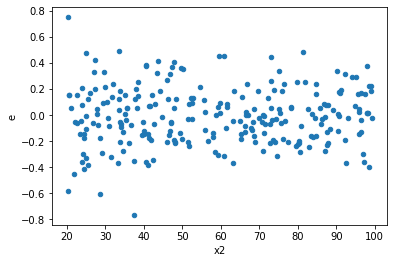

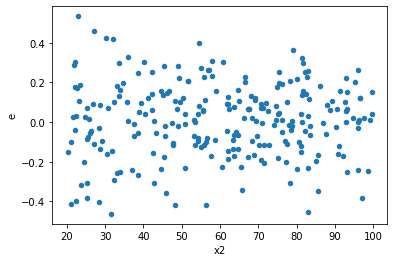

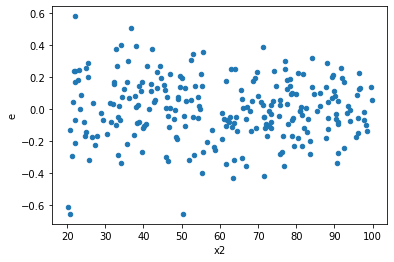

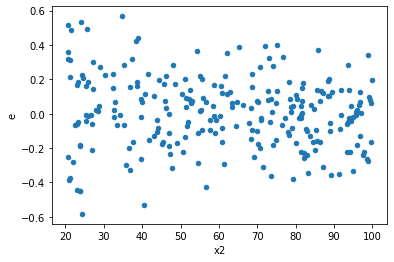

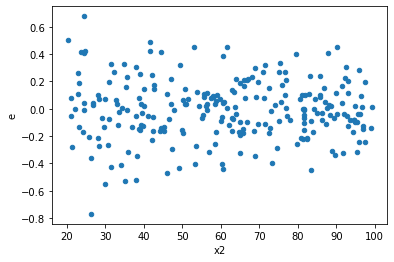

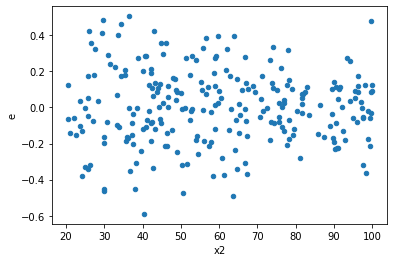

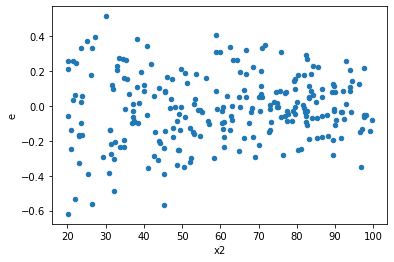

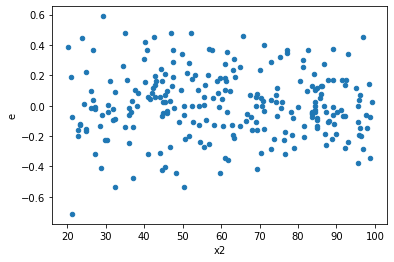

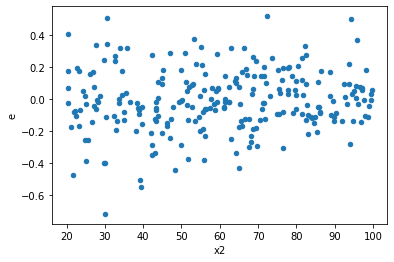

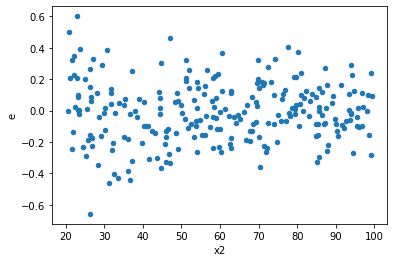

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
24.0,97.0,97.0,4.423610958762259,4.485123396851036,0.04560423668827071,0.04623838553454677,1.0139054809887686,0.9459213517493732,0.5270393241253134,0.4729606758746866,Reject001=1 : Homoscedasticity
29.0,97.0,97.0,4.086705849490795,4.233536429413506,0.042130988139080366,0.04364470545787119,1.035928834941963,0.8623584049996671,0.5688207975001665,0.43117920249983355,Reject001=1 : Homoscedasticity
30.0,97.0,97.0,3.6542195146995664,3.7670691190432035,0.03767236613092337,0.03883576411384746,1.030881999258579,0.8812483741999351,0.5593758129000325,0.44062418709996753,Reject001=1 : Homoscedasticity
33.0,97.0,97.0,3.9980055575192424,4.091382112204016,0.041216552139373634,0.04217919703303109,1.023355784113195,0.909715469621025,0.5451422651894875,0.4548577348105125,Reject001=1 : Homoscedasticity
148.0,97.0,97.0,2.6776846120445126,2.921146570640687,0.027604996000458893,0.030114913099388525,1.0909225670196767,0.6691084802393577,0.6654457598803212,0.3345542401196788,Reject001=1 : Homoscedasticity
176.0,97.0,97.0,3.5081419437742047,3.77101265527995,0.03616641179148665,0.03887641912659742,1.0749316064511738,0.7226867784030238,0.6386566107984881,0.3613433892015119,Reject001=1 : Homoscedasticity
206.0,97.0,97.0,3.2116994364260205,3.878238922740975,0.03311030346830949,0.039981844564339945,1.207534826813271,0.3546642693332047,0.8226678653333976,0.17733213466660236,Reject001=1 : Homoscedasticity
211.0,97.0,97.0,3.6531239613007584,4.016495058802697,0.0376610717659872,0.041407165554666975,1.0994685921833742,0.6414447809456401,0.67927760952718,0.32072239047282003,Reject001=1 : Homoscedasticity
218.0,97.0,97.0,3.216776990098271,3.519131956728051,0.0331626493824564,0.03627971089410362,1.093993138958801,0.6590894666678788,0.6704552666660606,0.3295447333339394,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,4.904711860568211,3.985159630879977,0.05056403979967228,0.04108411990597915,0.8125165645140052,0.3082684583250603,Reject001=1 : Homoscedasticity
1.0,97.0,97.0,4.297418369763623,2.8658215776276874,0.04430328216251157,0.02954455234667719,0.666870509464807,0.047332032138621805,Reject001=1 : Homoscedasticity
2.0,97.0,97.0,3.469962325975051,2.7479625993804087,0.03577280748427888,0.028329511333818645,0.7919286554813639,0.2523990978156444,Reject001=1 : Homoscedasticity
3.0,97.0,97.0,4.950032238490663,3.272937322294768,0.05103126019062539,0.033741621879327506,0.6611951528002037,0.04288121733296025,Reject001=1 : Homoscedasticity
4.0,97.0,97.0,5.912037900495372,3.3826828775211735,0.06094884433500384,0.034873019355888386,0.5721686725380662,0.0064325054561469456,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,4.431893455886618,2.9443147019085583,0.04568962325656307,0.03035375981349029,0.6643469052708841,0.04531161089406067,Reject001=1 : Homoscedasticity
6.0,97.0,97.0,4.919962519344063,2.547211141365661,0.05072126308602127,0.026259908673872793,0.5177297858165918,0.001350678636786687,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,5.220322444800541,4.359381647031116,0.05381775716289217,0.04494207883537233,0.8350790000286429,0.3763487901575193,Reject001=1 : Homoscedasticity
8.0,97.0,97.0,3.514705028292916,3.0843424628005125,0.036234072456628005,0.03179734497732487,0.8775537173025784,0.5213071077646959,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      727
Reject001=0 : Heteroscedasticity    273
Name: Result_test, dtype: int64